# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Лискунов Роман Геннадьвич

In [171]:
from math import isnan
import matplotlib as mpl
from pprint import pprint
import matplotlib.pyplot as plt
from warnings import filterwarnings
from typing import (
    Any,
    Union, List
)
from pandas import (
    DataFrame,
    read_csv,
    Series,
    read_table
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

In [172]:
filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [173]:
sop1: DataFrame = DataFrame(
    read_table(
        "data/train/SOP1.dat",
        sep="\s",
        header=0
    )
)
sop1.name = "SOP1"

In [174]:
sop2: DataFrame = DataFrame(
    read_table(
        "data/train/SOP2.dat",
        sep="\s",
        header=0
    )
)
sop2.name = "SOP2"

In [175]:
sop3: DataFrame = DataFrame(
    read_table(
        "data/train/SOP3.dat",
        sep="\s",
        header=0
    )
)
sop3.name = "SOP3"

In [176]:
target1: DataFrame = DataFrame(
    read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

In [177]:
target2: DataFrame = DataFrame(
    read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

In [178]:
target3: DataFrame = DataFrame(
    read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"

##  Отобразите несколько первых и несколько последних записей.

In [179]:
def printer(variable: DataFrame) -> None:
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [180]:
printer(sop1)

'SOP1'

   0000  29-08-03  12:34:21  +20C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0        35   202          27          29   35           0   
1     2         0        23   190          27          22   29           0   
2     3         1         0   188          24          10   13           0   
3     4         5         0   183          26           6    1           0   
4     5         4         0   188          32           4    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11   16  Unnamed: 13  Unnamed: 14  \
0           0  255          147           54  119          125          212   
1           0  255          147           56   95          156          223   
2           0  255          145           59   40          172          254   
3           0  255          153           66   22          172          255   
4           0  255          157           62   18          170          255   

    5  СОП1  
0  17    39  
1  13    27  
2  10 

In [181]:
printer(sop2)

'SOP2'

   0000  29-08-03  13:00:27  +23C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0         0   175          12           0    0           0   
1     2         0         0   159          10          10    0           0   
2     3         0         0   139          25          48    0           0   
3     4         0         0   130          54          61    0           0   
4     5         0         0   110          54          57    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           0  255          112            0   0          233          173   
1           0  255          108            0   0          222          173   
2           0  255          145            0   0          230          175   
3           0  255          216            0   1          237          185   
4           0  236          207            3   4          239          205   

    5  СОП2  
0   2    23  
1  10    34  
2  18    18 

In [182]:
printer(sop3)

'SOP3'

   0000  29-08-03  13:49:13  +21C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0         0     0          10         148   56           0   
1     2         0         0     0          28         129   55           0   
2     3         0         0     0          48          94   58          13   
3     4         0         0     0          54          68   51           0   
4     5         0         0     0          81          46   36           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           3   39          118            0   4           88          154   
1           0   48          150            0   0           67          140   
2           0   16          210            0   0           47           98   
3           0   18          244            2   0           37           73   
4           0   16          255           11   0           41           58   

    5  СОП3  
0  49    14  
1  54     5  
2  59    62 

In [183]:
printer(target1)

'target1'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              51           42.0               7           L       A
1             200           40.0               6           L       B
2             278           39.0               4           L       A
3             365           43.0               6           L       B
4             460           27.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
3             365           43.0               6           L       B
4             460           27.0               5           L       A
5             845           36.0               4           L       B
6             959           62.0               6           L       A
7             141            NaN               4           T        






In [184]:
printer(target2)

'target2'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0             178           37.0               6           L       B
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A
5             123            NaN               3           T        






In [185]:
printer(target3)

'target3'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              26           42.0               5           L       A
1             172           47.0               6           L       B
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A
5             971           50.0               5           L       B
6             112            NaN               4           T        






##  Ящик с усами и временные реализации.

In [186]:
def box(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(variable.name)
    ax.boxplot(variable)


def hist(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(variable.name)
    ax.hist(variable)

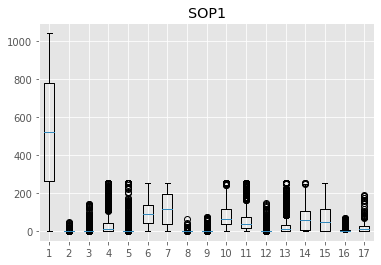

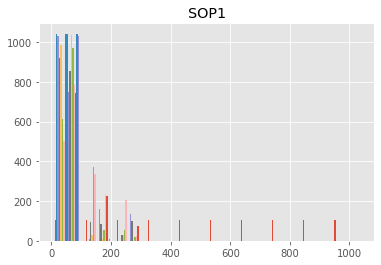

In [187]:
box(sop1)
hist(sop1);

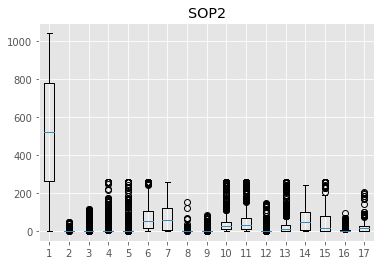

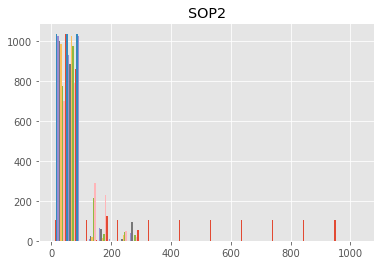

In [188]:
box(sop2)
hist(sop2);

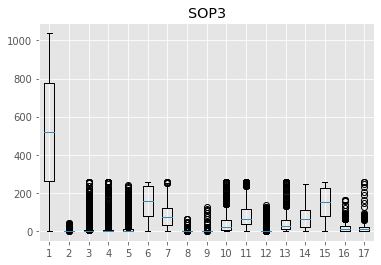

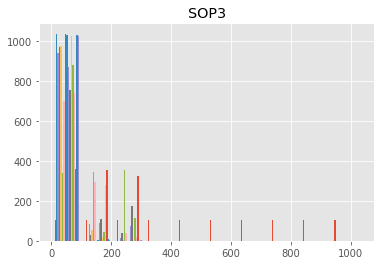

In [189]:
box(sop3)
hist(sop3);

## Вектор с результатами наличия дефектов

In [190]:
array1: Union[Union[list[int], None], Any] = [0] * sop1.count()[0]
array2: Union[Union[list[int], None], Any] = [0] * sop2.count()[0]
array3: Union[Union[list[int], None], Any] = [0] * sop3.count()[0]

In [191]:
ser1: Series = Series(data=array1)
ser2: Series = Series(data=array2)
ser3: Series = Series(data=array3)

In [192]:
def defects(target: DataFrame, series: Series) -> Series:
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = 1
    return series

In [193]:
ser1 = defects(target1, ser1)
ser2 = defects(target2, ser2)
ser3 = defects(target2, ser3)

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [194]:
serH1: Series = Series(data=array1)
serH2: Series = Series(data=array2)
serH3: Series = Series(data=array3)

In [195]:
def defects_height(target: DataFrame, series: Series) -> Series:
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = row['Высота дефекта']
    return series

In [196]:
serH1: Series = defects_height(target1, ser1)
serH2: Series = defects_height(target2, ser2)
serH3: Series = defects_height(target3, ser3)

## Разбиение данных на обучающую и проверочную выборки

In [197]:
sop_train1, sop_test1, target_train1, target_test1 = train_test_split(sop1, ser1, test_size=0.3, train_size=0.7)
sop_train2, sop_test2, target_train2, target_test2 = train_test_split(sop2, ser2, test_size=0.3, train_size=0.7)
sop_train3, sop_test3, target_train3, target_test3 = train_test_split(sop3, ser3, test_size=0.3, train_size=0.7)

## Последовательное применение алгоритмов

In [198]:
def algorithms(sop_train: object, target_train: object) -> object:
    lr: LogisticRegression = LogisticRegression()
    lr.fit(sop_train, target_train)

    sgdc: SGDClassifier = SGDClassifier()
    sgdc.fit(sop_train, target_train)

    rc: RidgeClassifier = RidgeClassifier()
    rc.fit(sop_train, target_train)

    return lr, sgdc, rc

In [199]:
lr1, sgdc1, rc1 = algorithms(sop_train1, target_train1)

In [200]:
lr2, sgdc2, rc2 = algorithms(sop_train2, target_train2)

In [201]:
lr3, sgdc3, rc3 = algorithms(sop_train3, target_train3)

## Оценка качества модели

In [202]:
def estimate(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}")

### LogisticRegression

In [203]:
estimate(
    classifier=lr1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: 0.053
mean_absolute_error: 1.067
classification_report:               precision    recall  f1-score   support

           0       0.84      0.93      0.88       230
           4       0.58      0.44      0.50        16
           5       0.70      0.78      0.74         9
           6       0.67      0.35      0.46        46
           7       0.73      0.67      0.70        12

    accuracy                           0.81       313
   macro avg       0.70      0.63      0.65       313
weighted avg       0.79      0.81      0.79       313



In [204]:
estimate(
    classifier=lr2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: 0.13
mean_absolute_error: 0.628
classification_report:               precision    recall  f1-score   support

           0       0.90      0.96      0.93       257
           4       0.82      0.75      0.78        12
           5       0.63      0.39      0.48        31
           6       0.67      0.50      0.57        12

    accuracy                           0.88       312
   macro avg       0.75      0.65      0.69       312
weighted avg       0.86      0.88      0.86       312



In [205]:
estimate(
    classifier=lr3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.005
mean_absolute_error: 1.196
classification_report:               precision    recall  f1-score   support

           0       0.75      0.89      0.81       190
           1       0.75      0.33      0.46        36
           4       0.39      0.41      0.40        17
           5       0.62      0.16      0.26        31
           6       0.88      0.88      0.88        17
           8       0.44      0.52      0.48        21

    accuracy                           0.71       312
   macro avg       0.64      0.53      0.55       312
weighted avg       0.70      0.71      0.68       312



### SGDClassifier

In [206]:
estimate(
    classifier=sgdc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.204
mean_absolute_error: 1.339
classification_report:               precision    recall  f1-score   support

           0       0.77      0.98      0.86       230
           4       1.00      0.19      0.32        16
           5       1.00      0.22      0.36         9
           6       0.44      0.15      0.23        46
           7       0.00      0.00      0.00        12

    accuracy                           0.76       313
   macro avg       0.64      0.31      0.35       313
weighted avg       0.71      0.76      0.69       313



In [207]:
estimate(
    classifier=sgdc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: 0.02
mean_absolute_error: 0.686
classification_report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       257
           4       1.00      0.58      0.74        12
           5       0.76      0.42      0.54        31
           6       0.25      0.08      0.12        12

    accuracy                           0.87       312
   macro avg       0.72      0.51      0.58       312
weighted avg       0.85      0.87      0.85       312



In [208]:
estimate(
    classifier=sgdc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: 0.049
mean_absolute_error: 1.628
classification_report:               precision    recall  f1-score   support

           0       0.79      0.10      0.18       190
           1       0.14      1.00      0.25        36
           4       0.00      0.00      0.00        17
           5       0.43      0.10      0.16        31
           6       1.00      0.82      0.90        17
           8       0.47      0.33      0.39        21

    accuracy                           0.25       312
   macro avg       0.47      0.39      0.31       312
weighted avg       0.63      0.25      0.23       312



### RidgeClassifier

In [209]:
estimate(
    classifier=rc1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.228
mean_absolute_error: 1.361
classification_report:               precision    recall  f1-score   support

           0       0.76      0.98      0.86       230
           4       0.80      0.25      0.38        16
           5       0.00      0.00      0.00         9
           6       0.75      0.13      0.22        46
           7       0.67      0.17      0.27        12

    accuracy                           0.76       313
   macro avg       0.60      0.31      0.35       313
weighted avg       0.74      0.76      0.69       313



In [210]:
estimate(
    classifier=rc2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.097
mean_absolute_error: 0.785
classification_report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       257
           4       1.00      0.42      0.59        12
           5       0.75      0.10      0.17        31
           6       0.00      0.00      0.00        12

    accuracy                           0.85       312
   macro avg       0.65      0.38      0.42       312
weighted avg       0.81      0.85      0.79       312



In [211]:
estimate(
    classifier=rc3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.164
mean_absolute_error: 1.375
classification_report:               precision    recall  f1-score   support

           0       0.66      0.99      0.79       190
           1       1.00      0.11      0.20        36
           4       1.00      0.12      0.21        17
           5       0.62      0.16      0.26        31
           6       0.92      0.65      0.76        17
           8       0.00      0.00      0.00        21

    accuracy                           0.67       312
   macro avg       0.70      0.34      0.37       312
weighted avg       0.68      0.67      0.58       312



## Подбор гиперпараметров

In [212]:
def hyperparameters(sop_train: object, target_train: object) -> object:
    print("LogisticRegression")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    }
    grid: GridSearchCV = GridSearchCV(
        LogisticRegression(),
        parameters,
        cv=5
    )
    lr_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(lr_grid, end="\n\n\n")

    print("SGDClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [10 ** x for x in range(-6, 1)],
        'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
    }
    grid: GridSearchCV = GridSearchCV(
        SGDClassifier(),
        parameters,
        cv=5
    )
    sgdc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(sgdc_grid, end="\n\n\n")

    print("RidgeClassifier")
    parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
        'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
    grid: GridSearchCV = GridSearchCV(
        RidgeClassifier(),
        parameters,
        cv=5
    )
    rc_grid: Union[GridSearchCV, Any] = grid.fit(sop_train, target_train)
    print(rc_grid, end="\n\n\n")

    return lr_grid, sgdc_grid, rc_grid

In [213]:
lr_grid1, sgdc_grid1, rc_grid1 = hyperparameters(
    sop_train=sop_train1,
    target_train=target_train1
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [214]:
lr_grid2, sgdc_grid2, rc_grid2 = hyperparameters(
    sop_train=sop_train2,
    target_train=target_train2
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




In [215]:
lr_grid3, sgdc_grid3, rc_grid3 = hyperparameters(
    sop_train=sop_train3,
    target_train=target_train3
)

LogisticRegression
GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})


SGDClassifier
GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95,
                                      1]})


RidgeClassifier
GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]})




## Заново обучите модель с подобранными гиперпараметрам

In [216]:
def relearn(classifier: object, target_test: object, sop_test: object) -> None:
    pred: object = classifier.predict(sop_test)
    print(f"r2_score: {round(r2_score(target_test, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(target_test, pred), 3)}")
    print(f"classification_report: {classification_report(target_test, pred)}")

### LogisticRegression

In [217]:
relearn(
    classifier=lr_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.013
mean_absolute_error: 1.131
classification_report:               precision    recall  f1-score   support

           0       0.83      0.92      0.87       230
           4       0.58      0.44      0.50        16
           5       0.78      0.78      0.78         9
           6       0.59      0.35      0.44        46
           7       0.70      0.58      0.64        12

    accuracy                           0.80       313
   macro avg       0.70      0.61      0.65       313
weighted avg       0.78      0.80      0.78       313



In [218]:
relearn(
    classifier=lr_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: 0.048
mean_absolute_error: 0.676
classification_report:               precision    recall  f1-score   support

           0       0.89      0.96      0.92       257
           4       0.82      0.75      0.78        12
           5       0.67      0.39      0.49        31
           6       0.57      0.33      0.42        12

    accuracy                           0.87       312
   macro avg       0.74      0.61      0.65       312
weighted avg       0.85      0.87      0.86       312



In [219]:
relearn(
    classifier=lr_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.014
mean_absolute_error: 1.208
classification_report:               precision    recall  f1-score   support

           0       0.74      0.89      0.81       190
           1       0.71      0.33      0.45        36
           4       0.39      0.41      0.40        17
           5       0.57      0.13      0.21        31
           6       0.83      0.88      0.86        17
           8       0.44      0.52      0.48        21

    accuracy                           0.70       312
   macro avg       0.61      0.53      0.53       312
weighted avg       0.69      0.70      0.67       312



### SGDClassifier

In [220]:
relearn(
    classifier=sgdc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -2.135
mean_absolute_error: 3.492
classification_report:               precision    recall  f1-score   support

           0       0.84      0.26      0.39       230
           4       0.19      0.25      0.22        16
           5       1.00      0.11      0.20         9
           6       0.21      0.98      0.34        46
           7       0.67      0.17      0.27        12

    accuracy                           0.35       313
   macro avg       0.58      0.35      0.28       313
weighted avg       0.71      0.35      0.37       313



In [221]:
relearn(
    classifier=sgdc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.147
mean_absolute_error: 0.817
classification_report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91       257
           4       0.80      0.67      0.73        12
           5       0.00      0.00      0.00        31
           6       0.33      0.17      0.22        12

    accuracy                           0.84       312
   macro avg       0.50      0.45      0.47       312
weighted avg       0.74      0.84      0.79       312



In [222]:
relearn(
    classifier=sgdc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: 0.079
mean_absolute_error: 1.157
classification_report:               precision    recall  f1-score   support

           0       0.76      0.88      0.81       190
           1       0.39      0.33      0.36        36
           4       0.34      0.71      0.46        17
           5       1.00      0.03      0.06        31
           6       1.00      0.82      0.90        17
           8       0.36      0.19      0.25        21

    accuracy                           0.67       312
   macro avg       0.64      0.49      0.48       312
weighted avg       0.70      0.67      0.63       312



### RidgeClassifier

In [223]:
relearn(
    classifier=rc_grid1,
    target_test=target_test1,
    sop_test=sop_test1
)

r2_score: -0.228
mean_absolute_error: 1.361
classification_report:               precision    recall  f1-score   support

           0       0.76      0.98      0.86       230
           4       0.80      0.25      0.38        16
           5       0.00      0.00      0.00         9
           6       0.75      0.13      0.22        46
           7       0.67      0.17      0.27        12

    accuracy                           0.76       313
   macro avg       0.60      0.31      0.35       313
weighted avg       0.74      0.76      0.69       313



In [224]:
relearn(
    classifier=rc_grid2,
    target_test=target_test2,
    sop_test=sop_test2
)

r2_score: -0.097
mean_absolute_error: 0.785
classification_report:               precision    recall  f1-score   support

           0       0.84      1.00      0.91       257
           4       1.00      0.42      0.59        12
           5       0.75      0.10      0.17        31
           6       0.00      0.00      0.00        12

    accuracy                           0.85       312
   macro avg       0.65      0.38      0.42       312
weighted avg       0.81      0.85      0.79       312



In [225]:
relearn(
    classifier=rc_grid3,
    target_test=target_test3,
    sop_test=sop_test3
)

r2_score: -0.164
mean_absolute_error: 1.375
classification_report:               precision    recall  f1-score   support

           0       0.66      0.99      0.79       190
           1       1.00      0.11      0.20        36
           4       1.00      0.12      0.21        17
           5       0.62      0.16      0.26        31
           6       0.92      0.65      0.76        17
           8       0.00      0.00      0.00        21

    accuracy                           0.67       312
   macro avg       0.70      0.34      0.37       312
weighted avg       0.68      0.67      0.58       312



# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

Система ПУЗК - это система полуавтоматического ультразвукового контроля. Она предназначена для выявления продольных и поперечных дефектов, для определения координат и условных размеров дефекта и проведения эксплуатационного контроля.

В состав системы входят 8 преобразователей, располагающихся по обе стороны сварного шва. Часть из них является генераторами, а часть приемниками (усилителями) акустического сигнала, два преобразователя совмещают упомянутые выше функции.

В данной системе реализуются эхо-метод, теневой метод и эхо-контактный.

При эхо-методе преобразователи располагаются с одной стороны сварного соединения. Метод основан на том, что генератор излучает ультразвуковую волну, которая отражается от дефекта и принимается усилителем. В отсутствие дефекта сигнал на приемнике отсутствует.

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

При эхо-контактном методе преобразователь генерирует колебания (то есть выступает в роли генератора) и он же принимает отражённые от дефектов эхо-сигналы (как приёмник).

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

При теневом методе генератор и приемник располагаются с разных сторон шва. Если дефекта нет, волна без потерь проходит от генератора к приемнику. При наличии дефекта сигнал на приемнике ослаблен из-за рассеивания ультразвуковой волны на дефекте.

О наличии дефекта судят по уменьшению амплитуды УЗ-колебаний, прошедших от излучателя к приемнику. Чем больше размер дефекта, тем меньше амплитуда прошедшего сигнала. Можно применять только при двустороннем доступе к изделию.

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?

С помощью ПУЗК можно выявлять продольные и поперечные дефекты.

Продольные дефекты - дефекты (трещины), расположенные вдоль оси сварного шва.

Поперечные дефекты - дефекты, расположенные перпендикулярно оси сварного шва.

В идеале амплитуда эхо-сигнала при отсутствии дефекта должна равняться нулю, а амплитуда теневого сигнала – 255 усл.ед. При наличии дефекта должно наблюдаться обратное соотношение сигналов по эхо и теневым тактам.
